Reusable Code: Modules
===============
So far, the code we've explored has been simple snippets relegated to the IPython notebook window.  We will obviously want reusable code and callable
scripts that we can execute from the command line.  But how?

The Unix-initiated will immediately turn towards the *shebang*.  Add it to the top of a source code file, make the file executable (*chmod +x [filename]*),
then call the code like a normal script.  

For this tutorial, the IPython notebook will not be useful.  Copy and paste this code into a separate file:

In [1]:
#!/usr/bin/env python
'''
Hello world, the script.
'''

print('Hello world\n')

Hello world



When we save this file as *hello_world.py* (note the common *.py* extension), we can call it from the command line like a normal script.  We can do this by either running python on our file:

> `python hello_world.py`

or by making the file an executable:

> `chmod +x hello_world.py`
> `./hello_world.py`

What if we want
to run all of these commands inside of the IPython shell?  We can do so easily with the magic of **run**.

In [2]:
run hello_world.py

Hello world



These are both fine and well, but it is important to note that all files like this are Python *modules*, similar to all modules that we have used to date
(e.g. **cPickle**, **numpy**, and anything else that followed the *import* command.)  Let's import our file like a module.

In [3]:
import hello_world

Hello world



When you import a Python module (which is simply a text file with Python commands), **each and every line of the file is executed as if you typed it 
into the terminal.**  Note that we did NOT include the file extension (.py).  Furthermore, the module is assigned to the variable with the same name as the 
module itself by default.  We now have a *module object*, "hello_world", that contains variables, functions, etc. that were defined inside of that module.
Because our module was empty, it's pretty useless.  We'll fix that soon.

Let's import again.

In [4]:
import hello_world

Nothing happened.  After a module has been imported, **a second import will not re-run the code in the module until the session is restarted**.  
This makes sense: many different parts of
large codes use the same modules, re-loading them every time would be wasteful.  If you must reload it (for example, the source code has changed), use
**reload()**

In [5]:
from importlib import reload
reload(hello_world)

Hello world



<module 'hello_world' from '/Users/wellingdt/projects/python_website/notebooks/hello_world.py'>

An important note: in python2.\*, **reload** is a global-level command-- you don't need to import it.  In python3.\*, we need to get it from **importlib**.

Let's make a more useful module.  Save the following commands in 'mod1.py':

In [6]:
'''
A good doc string is your friend.
'''

var1 = 'dogs'
var2 = range(21)

def hello_world():
    '''
    Print Hello World.
    '''
    print("Hello World.\n")

Now, import.

In [7]:
import mod1
help(mod1)
print(mod1.var1)
mod1.hello_world()

Help on module mod1:

NAME
    mod1 - A good doc string is your friend.

FUNCTIONS
    hello_world()
        Print Hello World.

DATA
    var1 = 'dogs'
    var2 = range(0, 21)

FILE
    /Users/wellingdt/projects/python_website/notebooks/mod1.py


dogs
Hello World.



Notice how doc strings apply not just to functions, but also modules.  This is important for keeping well documented code.  Additionally, variables, 
functions, objects, etc. declared inside a module are accessible via the "dot" syntax that we recognize from the way we access object attributes and 
methods.  Long module names can lead to excessive typing.  For example, take the plotting library *Matplotlib* and it's sub-module, *pyplot*:

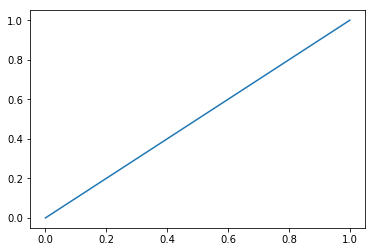

In [13]:
import matplotlib.pyplot
matplotlib.pyplot.plot([0,1])

Note the nested module heirarchy.  Matplotlib is a *package*, or a group of modules and sub-modules.  We'll get to that in a second.  The real problem here
is that to access a simple 4-letter function, *plot*, we had to type quite a lot.  Python has several ways to handle this:

1. Use the **as** syntax to assign long module names to a new subname.  This is the same as assigning module objects to a new variable.
2. Use the **from** syntax to only import certain parts of a large module.
3. Use __*__ syntax to dump the complete contents of the module into the current namespace.  This is not usually a good idea, as it can create messy, messy namespaces.

Let's take a look at each in order:

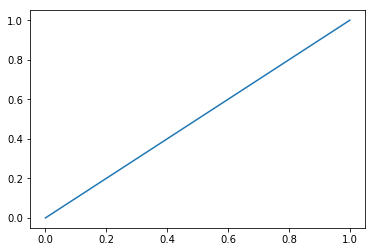

In [9]:
import matplotlib.pyplot as plt  # Rename the module for convenience.
plt.plot([0,1])

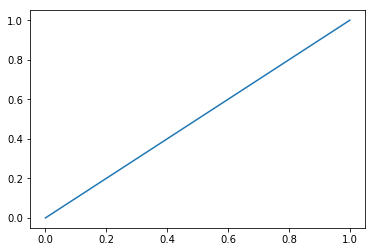

In [10]:
from matplotlib.pyplot import plot  # Only import the items we want.
plot([0,1])                         # Now, use the command as if it were declared in our current namespace.

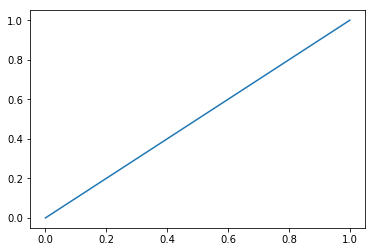

In [11]:
from matplotlib.pyplot import *  # !!! this is not usually a good idea !!!
plot([0,1])                      # Everything from the module has been dumped into the current namespace.

It's important to organize your code intellegently into modules.  Combine classes, functions, and variables that are related into a single module and 
make them available to Python via the __PYTHONPATH__ environment variable.  If a single module grows too large, consider upgrading to a *package*, which
is simply a folder full of modules.

Finally, we saw that importing a module causes every single line of code inside of the module to execute.  This is not always desireable.  For example,
you may write a script that contains many functions that are useful in other pieces of code.  Is it possible to make a source file act both as a callable
script and as a module, running different pieces of code under different circumstances?

Yes, actually.  This is a fairly common occurrence.  The key is the special intrinsic variable, **__name__**.  This variable tells us what namespace
we are in when code is being run.  Add this line to your mod1.py file:

    print(__name__)

Once this is added, run the following example:

In [17]:
print(__name__) # Top-level namespace.
reload(mod1)

__main__
mod1


<module 'mod1' from '/Users/wellingdt/projects/python_website/notebooks/mod1.py'>

The name of our top-level namespace that we are accessing interactively is **__main__**.  The namespace in which our module was executed while importing 
is the same name of the module.  We can change this if we either execute *mod1.py* from the command line or use IPython's **run** function:

In [16]:
run mod1.py

Interestingly, the module is now executed in the **__main__** namespace.  Because Python code knows where it is being executed, we can use this to make our
modules do double-duty as scripts or full programs.  Remove the `print __name__` statement and add these lines to *mod1.py*:

    if __name__ == '__main__':
        print('Running in script mode!')

Now, run this example.

In [18]:
reload(mod1)  # Run in module mode.

mod1


<module 'mod1' from '/Users/wellingdt/projects/python_website/notebooks/mod1.py'>

In [19]:
run mod1.py   # Run in script mode.

__main__
Running in script mode!


From this example, you should see that how you run a Python source file matters.  If you want a file to double as a module and a script, put the code that
you want to execute only in script mode under a `if __name__ == '__main__':` code block.